### Read cryo DAT files and plots X,Y,Z components

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read binary DAT file from magnetometer
from tkinter import *
from tkinter import filedialog
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)

filename = filedialog.askopenfilename(filetypes = (('binary DAT','typeName {DAT}')))
print(filename)

C:/Users/mgarc/OneDrive - Universitat de Barcelona/GitHub/paleomagnetism/ag005-1b.dat


In [3]:
#UNMARK TO PRINT THE LIST OF BYTES
'''try:
    with open(filename, "rb") as f:
        byte = f.read(1)
        sum_bytes = np.array(byte)
        n=1
        while byte:
            # Do stuff with byte.
            byte = f.read(1)
            sum_bytes = np.append(sum_bytes, byte)
            print(n, byte)
            n += 1
except IOError:
     print('Error While Opening the file!')  
'''

'try:\n    with open(filename, "rb") as f:\n        byte = f.read(1)\n        sum_bytes = np.array(byte)\n        n=1\n        while byte:\n            # Do stuff with byte.\n            byte = f.read(1)\n            sum_bytes = np.append(sum_bytes, byte)\n            print(n, byte)\n            n += 1\nexcept IOError:\n     print(\'Error While Opening the file!\')  \n'

In [4]:
with open(filename, 'r') as f:
    data = f.read()
    sample={}
    sample["name"]= data[15:24].rstrip('\x00')
    sample["vol"]= float(data[24:29].strip().strip('\x00'))
    sample["comment"] = data[30:57].strip().strip('\x00')
    sample["CoreAz"] = data[111:114]
    sample["CoreInc"] = data[114:118].strip().strip('\x00')
    sample["BedAz"] = data[118:123].strip('\x00')
    sample["BedInc"] = data[123:127].strip('\x00')
    sample["mag_Dec"] = data[142:147].strip('\x00')

sample_collection=[]
sample_collection.append(sample)
pd.DataFrame(sample_collection)

,name,vol,comment,CoreAz,CoreInc,BedAz,BedInc,mag_Dec
0,AG005-1B,10.0,Mar 11 2019 12:05,299,55,234,27,0.33


In [10]:
with open(filename, 'r') as f:
    data = f.read()
    demag_data=[]
    measurement = {}
    for n in range(len(data)):
        if data[n]=="Í":
            line = n+1
            step = data[line:line+4].strip().strip('\x00')
            treatment = data[line+4:line+5].strip().strip('\x00')
            X = float(data[line+65:line+76].strip().strip('\x00'))/ sample["vol"] * 1e+09 
            Y = float(data[line+97:line+108].strip().strip('\x00'))/ sample["vol"] * 1e+09
            Z = float(data[line+129:line+140].strip().strip('\x00'))/ sample["vol"] * 1e+09
            Intensity = np.sqrt(X**2 + Y**2 + Z**2)
            measurement ={"step":step,"treat":treatment,
                          "X":X,"Y":Y,"Z":Z, "Int (e-6A/m)":Intensity}
            demag_data.append(measurement)

sample_demag = pd.DataFrame(demag_data)
for n in range(len(sample_demag)):
    if sample_demag.loc[n,'step']=='NRM':
        sample_demag.loc[n,'step']= 20
    else:
        pass
sample_demag['step'] = pd.to_numeric(sample_demag.step, errors='coerce')
sample_demag.round(1)

,step,treat,X,Y,Z,Int (e-6A/m)
0,20,,-42.5,83.1,314.3,327.9
1,100,C,-14.9,60.2,154.4,166.4
2,200,C,-9.8,34.8,114.7,120.3
3,250,C,6.5,23.4,91.1,94.3
4,300,C,-9.4,42.6,46.7,63.9
5,350,C,-28.4,11.7,53.1,61.3
6,400,C,7.8,15.5,72.4,74.5
7,440,C,-33.8,17.0,69.7,79.3
8,480,C,-34.6,15.8,59.8,70.9
9,520,C,-25.4,17.0,105.2,109.6


<AxesSubplot:title={'center':'C:/Users/mgarc/OneDrive - Universitat de Barcelona/GitHub/paleomagnetism/ag005-1b.dat'}, xlabel='temp (ºC)', ylabel='Intensity E-6 A/m'>

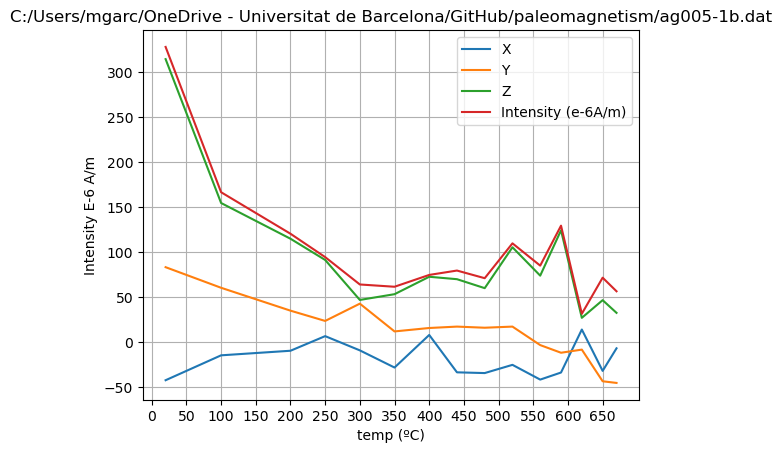

In [6]:
sample_demag.plot(x="step", grid=True, xticks=range(0,sample_demag['step'].max(),50),
                  title= filename, xlabel= "temp (ºC)", ylabel = "Intensity E-6 A/m")